In [ ]:
# Imports
from sys import path

path.append('..')
import pandas as pd
import numpy as np
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap

In [5]:
#loading data

# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [26]:
indices = [[],[],[],[]] 
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(indices[j]) < 10):
                indices[j].append(i)
            else:
                break

In [6]:
model_path = "../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts" 

# Check available models
import glob
available_models = glob.glob("../mlruns/644848172247683146/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/644848172247683146/models\m-0b4c886fda504b2195d37fc2f6a0320d\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-257fda79e9cd477e8c77e0db1b0e092a\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-3edde4cb8ea14d5286fed1b7f467ba7c\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-6e1a5214164c474f91aceb60dfe823ce\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-92e214ac42614226a254a486aa5807f0\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b0d1297d4f33430bb02bcec4e365c73f\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-b803db1ce5274bd6b2530463b25b42cf\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-e504c5635d5143df86a6c43e37d64fe9\artifacts\model.pkl
 - ../mlruns/644848172247683146/models\m-f8510aeddd7d416b88b50e1b0dc20da4\artifacts\model.pkl

 Model loaded from: ../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts


In [ ]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
    predict_fn=predict_fn, 
    data=X_train 
) 

# 2. Calcul des valeurs SHAP
shap_values = [[],[],[],[]]
for i in range(4):
    shap_values[i] = (calculate_shap_values(explainer_shap, X_test.iloc[indices[i]], nsamples=50))

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names,

  0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names,

  0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names,

  0%|          | 0/10 [00:00<?, ?it/s]

c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\samim\Documents\code\PD\Projet\.pdenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names,

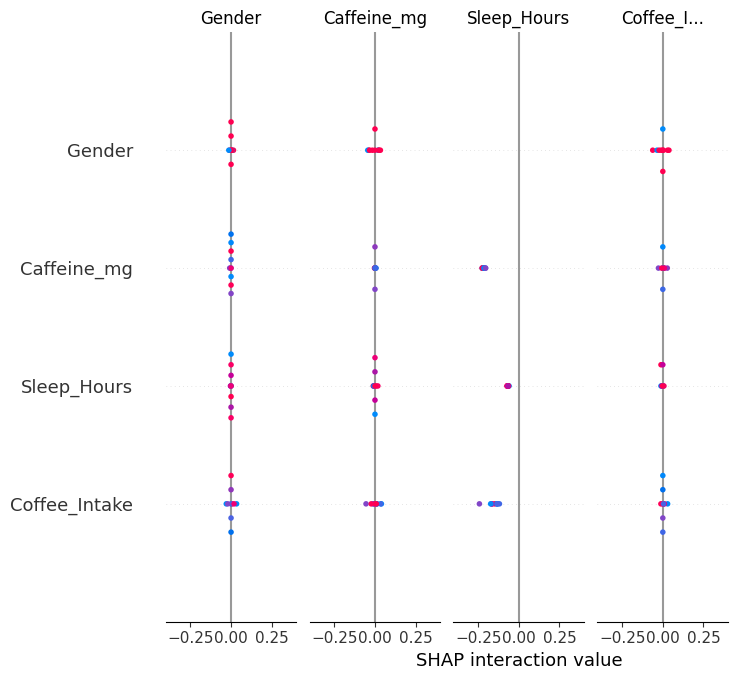

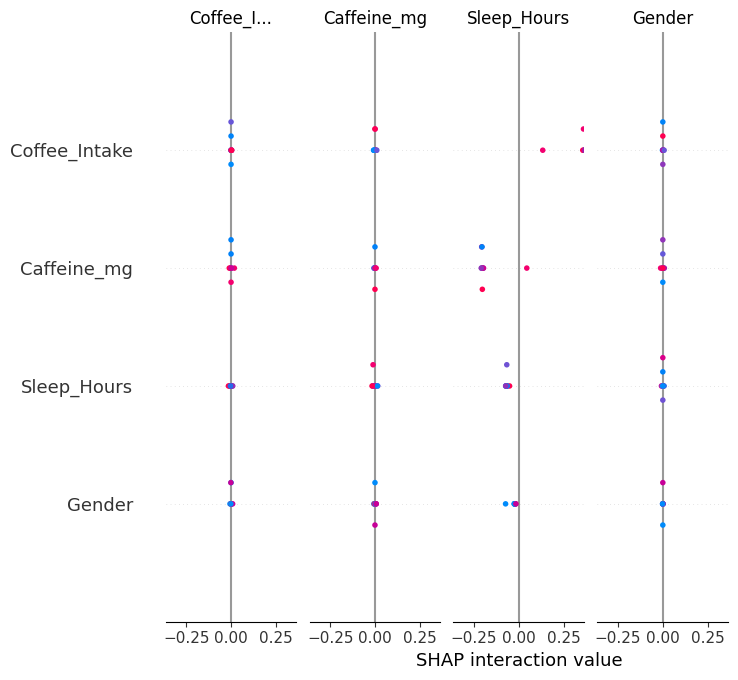

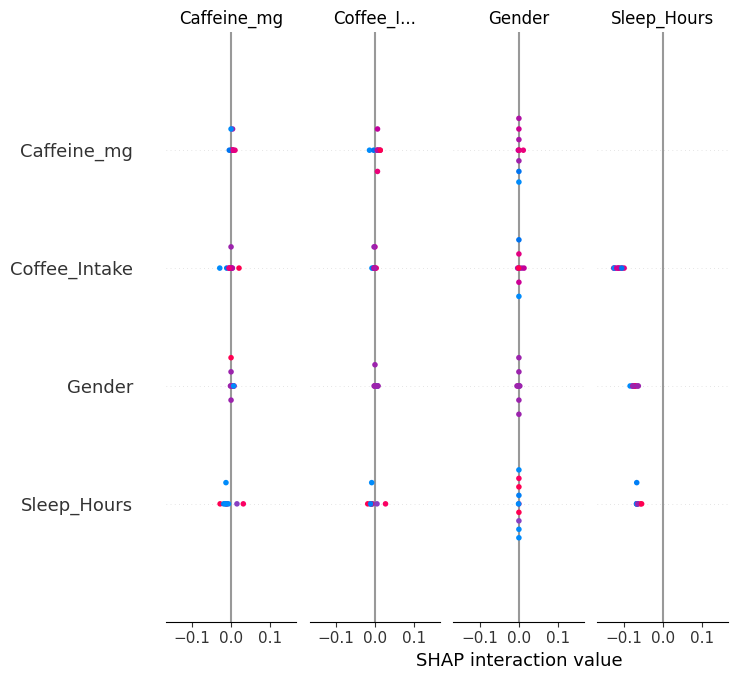

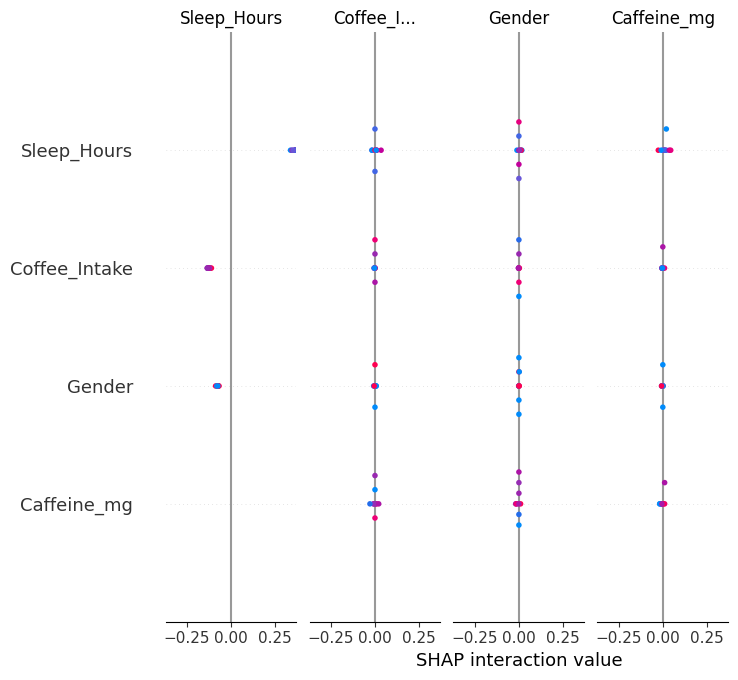

In [30]:
for i in range(4):    
    shap.summary_plot(shap_values[i], X_test.iloc[indices[i]], feature_names=X_test.columns)